<a href="https://colab.research.google.com/github/eduhwwh/Projeto_Data_Science/blob/main/ProjetoBancoDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este conjunto de dados contém registros detalhados de temperatura diária de janeiro de 2015 a dezembro de 2016. Cada entrada inclui o ano, mês, dia e a temperatura correspondente em Fahrenheit. O conjunto de dados visa fornecer insights sobre padrões climáticos, mudanças sazonais e variações de temperatura ao longo deste período.**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Link que tem o acesso aos dados da temperatura.
uri = "https://raw.githubusercontent.com/FelipeGadelha18/Projeto-Banco/main/TemperatureData.csv"

temp = pd.read_csv(uri)
temp.head()



,Year,Month,Day,TemperatureF
0,2015,January,1,23
1,2015,January,2,31
2,2015,January,3,25
3,2015,January,4,39
4,2015,January,5,29


In [ ]:
temp.columns = ["Ano", "Mês", "Dia", "Temperatura F"]
temp.head()

,Ano,Mês,Dia,Temperatura F
0,2015,January,1,23
1,2015,January,2,31
2,2015,January,3,25
3,2015,January,4,39
4,2015,January,5,29


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
temp

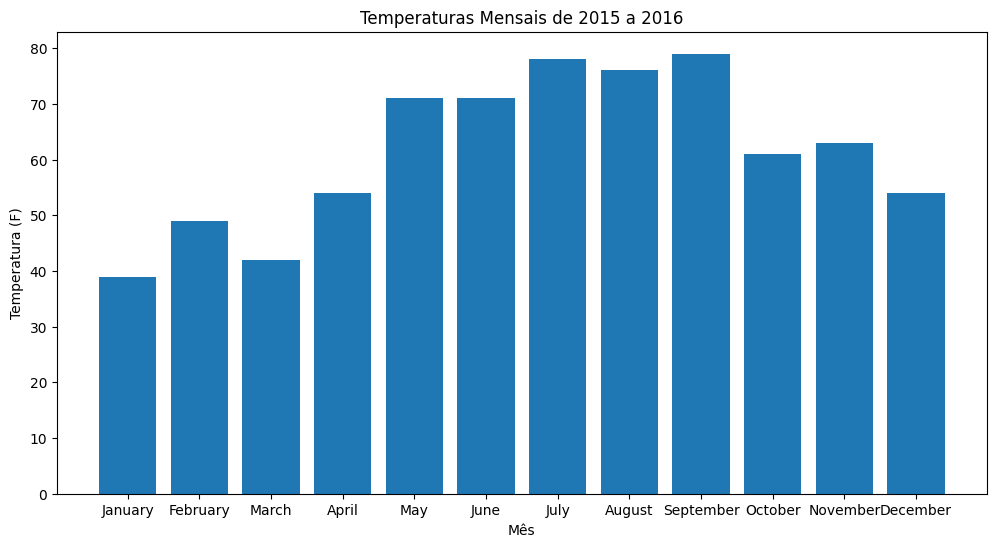

In [ ]:
# Gráfico representando as temperaturas medias de cada mês do ano de 2015.
temp_2015 = temp[temp['Ano'] == 2015]
plt.figure(figsize=(12, 6))
plt.bar(temp_2015['Mês'], temp_2015['Temperatura F'])
plt.xlabel('Mês')
plt.ylabel('Temperatura (F)')
plt.title('Temperaturas Mensais de 2015 a 2016')
plt.show()

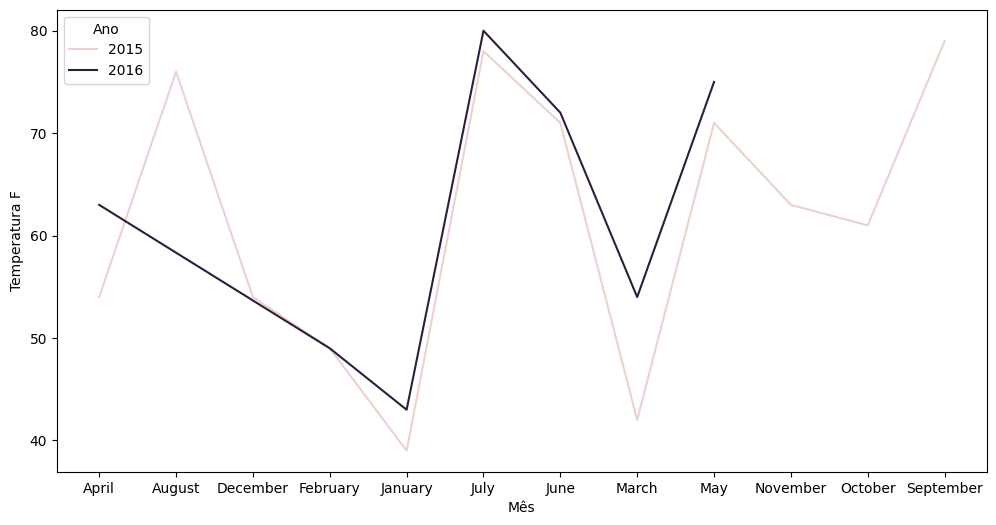

In [ ]:
# Gráfico responsável por analizar os meses de cada ano, e identificar o mês mais quente estre os dois.
temp_max = temp.groupby(['Ano', 'Mês'])['Temperatura F'].max().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mês', y='Temperatura F', hue='Ano', data=temp_max)
plt.show()

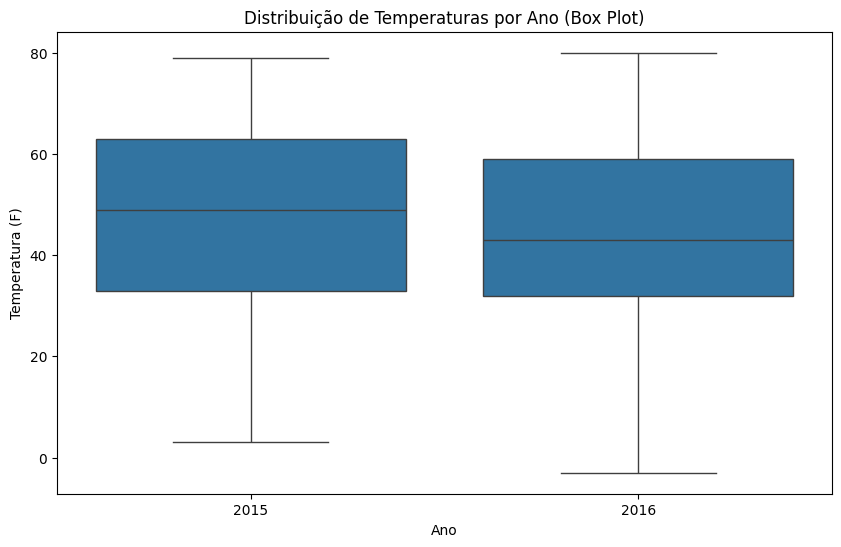

In [ ]:
# Distribuição das temperaturas por ano.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ano', y='Temperatura F', data=temp)
plt.xlabel('Ano')
plt.ylabel('Temperatura (F)')
plt.title('Distribuição de Temperaturas por Ano (Box Plot)')
plt.show()

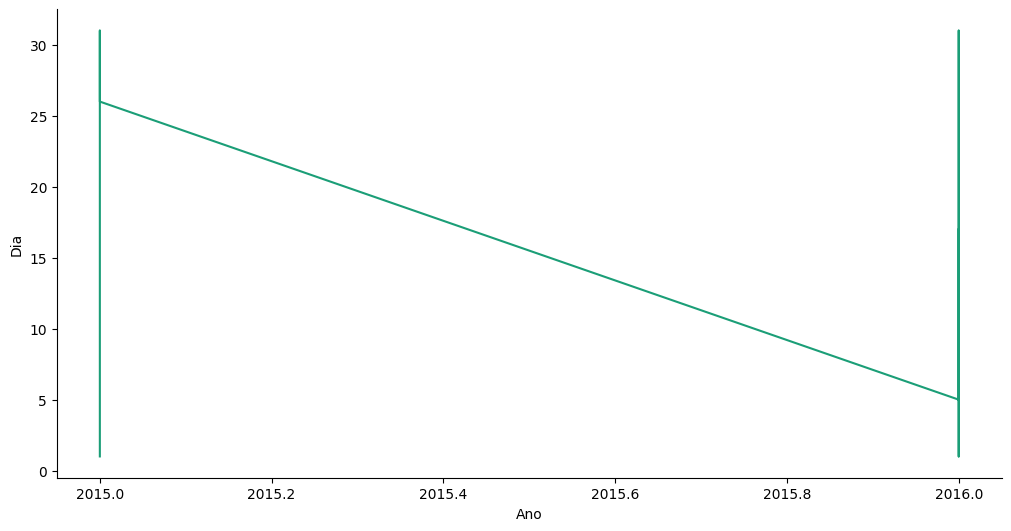

In [ ]:
# Gráfico Demonstrativo fazendo a relação da queda da temperatura do ano de 2016 comparado ao ano de 2015.
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ano']
  ys = series['Dia']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp.sort_values('Ano', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ano')
_ = plt.ylabel('Dia')

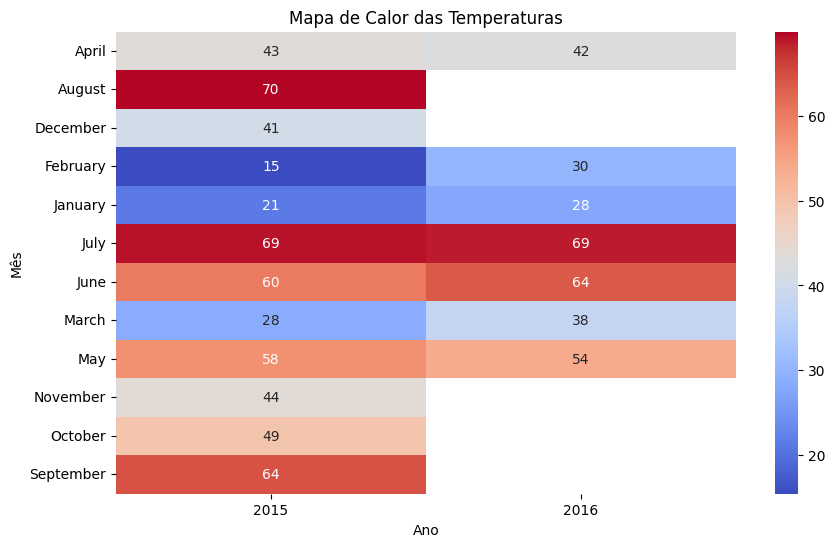

In [ ]:
# Gráfico de cores representando as temperaturas dos meses.
temp_pivot = temp.pivot_table(index='Mês', columns='Ano', values='Temperatura F')
plt.figure(figsize=(10, 6))
sns.heatmap(temp_pivot, annot=True, cmap='coolwarm')
plt.xlabel('Ano')
plt.ylabel('Mês')
plt.title('Mapa de Calor das Temperaturas')
plt.show()